# Проект "Принятие решений в бизнесе на основании А/В теста".

# Описание проекта
Мы работаем аналитиком крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
В данном проекте мы будем приоритизировать гипотезы, запускать A/B-тест и анализировать результаты. 

# Описание данных
Файл /datasets/hypothesis.csv.
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Файл /datasets/orders.csv. 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# План работы:
1. Откроем файлы с данными и изучим общую информацию. Далее проверим данные на наличие пропусков и дубликатов.
2. Приоритизируем гипотезы:
   Применим фреймворк ICE.
   Применим фреймворк RICE.
3. Проанализируем A/B-тест:
   Построим график кумулятивной выручки по группам.
   Построим график кумулятивного среднего чека по группам.
   Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
   Построим график кумулятивного среднего количества заказов на посетителя по группам.
   Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
   Построим точечный график количества заказов по пользователям.
   Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
   Построим точечный график стоимостей заказов.
   Посчитаем 95-й и 99-й перцентили стоимости заказов.
   Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
   Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
   Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
   Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
   Примем решение по результатам теста.

## Откроем файлы и изучим общую информацию

In [1]:
# Импортируем библиотеки, которые понадобятся нам в этом проекте 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 400

In [2]:
# Считаем данные из csv-файла в датафрейми сохраним в переменную
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')


In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
# Считаем данные из csv-файла в датафрейми сохраним в переменную
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')


In [7]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


### Выполним предобработку данных для файла с заказами

In [9]:
# Переименуем столбцы в таблице
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [10]:
# Приведем столбец с датой к типу datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# Проверим сколько пропусков есть в нашей таблице
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

**Вывод: пропусков не обнаружено.**

In [12]:
# Проверим сколько явных дубликатов есть в нашей таблице
orders.duplicated().sum()

0

**Вывод: явных дубликатов не обнаружено.**

In [13]:
# Проверим, что все заказы разделены только на две группы: А и В
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

**Вывод: в таблице встречаются только группы А и В, ошибки нет.**

In [14]:
# Проверим, за какие дни у нас есть данные в таблице
orders.groupby('date')['visitor_id'].nunique()

date
2019-08-01    40
2019-08-02    42
2019-08-03    40
2019-08-04    29
2019-08-05    47
2019-08-06    40
2019-08-07    42
2019-08-08    42
2019-08-09    37
2019-08-10    38
2019-08-11    26
2019-08-12    45
2019-08-13    35
2019-08-14    44
2019-08-15    45
2019-08-16    38
2019-08-17    23
2019-08-18    25
2019-08-19    42
2019-08-20    32
2019-08-21    35
2019-08-22    40
2019-08-23    39
2019-08-24    30
2019-08-25    24
2019-08-26    40
2019-08-27    43
2019-08-28    44
2019-08-29    39
2019-08-30    32
2019-08-31    30
Name: visitor_id, dtype: int64

**Вывод: в таблице представлены данные за август 2019 года, ни один месяца не пропущен.**

In [15]:
# Считаем данные из csv-файла в датафрейми сохраним в переменную
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [16]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Выполним предобработку данных для файла с визитами

In [18]:
# Приведем столбец с датой к типу datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [19]:
# Проверим сколько пропусков есть в нашей таблице
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

**Вывод: пропусков не обнаружено.**

In [20]:
# Проверим сколько явных дубликатов есть в нашей таблице
visitors.duplicated().sum()

0

**Вывод: явных дубликатов не обнаружено.**

In [21]:
# Проверим, что все заказы разделены только на две группы: А и В
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

**Вывод: в таблице встречаются только группы А и В, ошибки нет.**

In [22]:
# Проверим, за какие дни у нас есть данные в таблице
visitors.groupby('date')['group'].count()

date
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
2019-08-06    2
2019-08-07    2
2019-08-08    2
2019-08-09    2
2019-08-10    2
2019-08-11    2
2019-08-12    2
2019-08-13    2
2019-08-14    2
2019-08-15    2
2019-08-16    2
2019-08-17    2
2019-08-18    2
2019-08-19    2
2019-08-20    2
2019-08-21    2
2019-08-22    2
2019-08-23    2
2019-08-24    2
2019-08-25    2
2019-08-26    2
2019-08-27    2
2019-08-28    2
2019-08-29    2
2019-08-30    2
2019-08-31    2
Name: group, dtype: int64

**Вывод: в таблице представлены данные за август 2019 года, ни один месяца не пропущен.**

### Проверим корректность разбиения пользователей на группы

In [23]:
# Разделим таблицу orders на таблицы по группам А и В
users_A = orders.query('group == "A"')
users_B = orders.query('group == "B"')

In [24]:
# Получим id пользователей, которые встречаются в обеих таблицах 
a_in_b = users_A.loc[users_A['visitor_id'].isin(users_B['visitor_id'])]['visitor_id']
b_in_a = users_B.loc[users_B['visitor_id'].isin(users_A['visitor_id'])]['visitor_id']

In [25]:
# Объединим пользователей и удалим повторяющиеся значения
repeating_users = pd.concat([b_in_a, a_in_b], axis=0).drop_duplicates()

In [26]:
# Посчитаем количество пользователей, попавших в обе группы
repeating_users.shape[0]

58

In [27]:
# Удалим таких пользователей из таблицы orders
orders = orders.loc[~orders['visitor_id'].isin(repeating_users)]

#### Вывод: на данном этапе мы изучили общую информацию об исходных данных, проверили наличие пропусков в таблицах, проверили данные на наличие дубликатов. Дубликатов , пропусков и прочих ошибок в исходных данных обнаружено не было.
#### Также было обнаружено 58 пользователей, попавших в обе группы. Было принято решение удалить таких пользователей из рассмотрения.

## Часть 1. Приоритизация гипотез.

**Так как из-за отсутствия времени и ресурсов протестировать все гипотезы не получится, необходимо выбрать те гипотезы, которые максимизируют ожидаемое улучшение ключевых метрик бизнеса.**
**Фреймворки ICE и RICE одни из самых популярных способов приоритизации гипотез.**
**Они состоит из следующих компонент:
Reach — скольких пользователей затронет изменение, которое вы хотите внести;
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
Efforts — сколько стоит протестировать эту гипотезу.**
**Параметры фреймворков ICE и RICE оценивают в удобных шкалах: например, от 0 до 10 или в числах ряда Фибоначчи.**

##### Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [28]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ice

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [29]:
ice['hypothesis'].values[0]

'Запустить акцию, дающую скидку на товар в день рождения'

##### Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [30]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
rice

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [31]:
rice['hypothesis'].values[0]

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

#### Вывод при использовании разных фреймворков приоритизации гипотез мы получили разные результаты. Это связано с тем, что фреймворк RICE дополнительно учитывает параметр reach, поэтому наибольший балл получила гипотеза №7 у которой параметр reach равен 10.

## Часть 2. Анализ A/B-теста.

##### Сначала подготовим файл с кумулитивными данными с разбивкой по группам тестирования.
##### Добавим туда: количество заказов на указанную дату, количество пользователей, совершивших хотя бы один заказ, на указанную дату,  выручку на указанную дату, количество посетителей интернет-магазина на указанную дату.

In [32]:
# Создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [33]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [34]:
# Получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = datesGroups.apply\
(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [35]:
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [36]:
# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = datesGroups.apply\
(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [37]:
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [38]:
# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [39]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


##### Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

In [40]:
# Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders', 'visitors']]

In [41]:
# Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

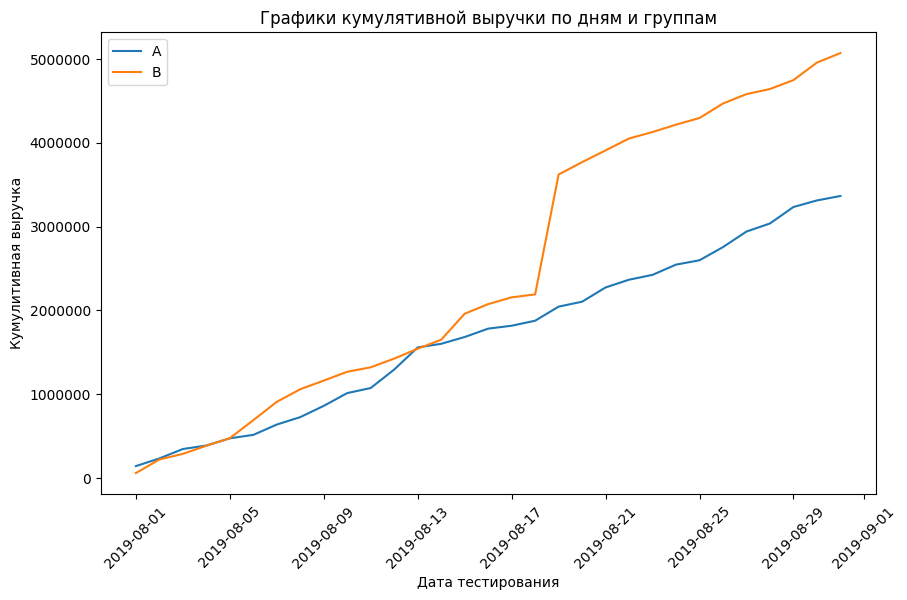

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_A['date'], cumulative_A['revenue'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['revenue'], label='B')
plt.legend()
plt.xlabel('Дата тестирования')
plt.ylabel('Кумулитивная выручка')
plt.title('Графики кумулятивной выручки по дням и группам')
plt.xticks(rotation='45')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.show()

**Вывод: Выручка увеличивается в течение всего теста. При этом график группы В имеет резкий скачок в районе даты 18.08.2019.
Возможно это говорит о наличии аномально больших заказов в данной группе.**

##### Построим графики кумулятивного среднего чека по дням и группам A/B-тестирования.

In [43]:
# В каждую таблицу добавим столбец со средним кумулитивным чеком
cumulative_A['avg_check'] = cumulative_A['revenue'] / cumulative_A['orders']
cumulative_B['avg_check'] = cumulative_B['revenue'] / cumulative_B['orders']

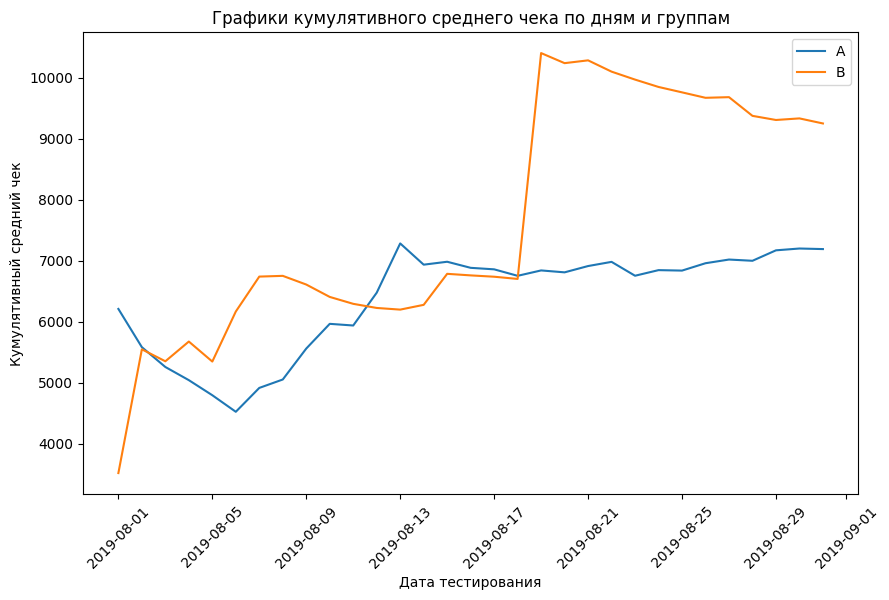

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_A['date'], cumulative_A['avg_check'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['avg_check'], label='B')
plt.legend() 
plt.xlabel('Дата тестирования')
plt.ylabel('Кумулятивный средний чек')
plt.title('Графики кумулятивного среднего чека по дням и группам')
plt.xticks(rotation='45')
plt.show()

**Вывод: В конце теста средний чек группы А стабилизировался, средний чек группы В продолжает незначительно снижаться.
Предположение о аномально больших заказах в группе В подтверждается - мы опять видим резкий скачок в районе даты 18.08.2019.**

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [45]:
# Собираем данные в одном датафрейме
cumulative_full = cumulative_A.merge(cumulative_B, on='date', how='left', suffixes=['A', 'B'])

In [46]:
cumulative_full.head()

,date,revenueA,ordersA,visitorsA,avg_checkA,revenueB,ordersB,visitorsB,avg_checkB
0,2019-08-01,142779,23,719,6207.782609,59758,17,713,3515.176471
1,2019-08-02,234381,42,1338,5580.500000,221801,40,1294,5545.025000
2,2019-08-03,346854,66,1845,5255.363636,288850,54,1803,5349.074074
3,2019-08-04,388030,77,2562,5039.350649,385740,68,2573,5672.647059
4,2019-08-05,474413,99,3318,4792.050505,475648,89,3280,5344.359551


In [47]:
# Добавим столбец с относительным различием средних чеков
cumulative_full['check_difference'] = (cumulative_full['avg_checkB'] / cumulative_full['avg_checkA']) - 1 

No handles with labels found to put in legend.


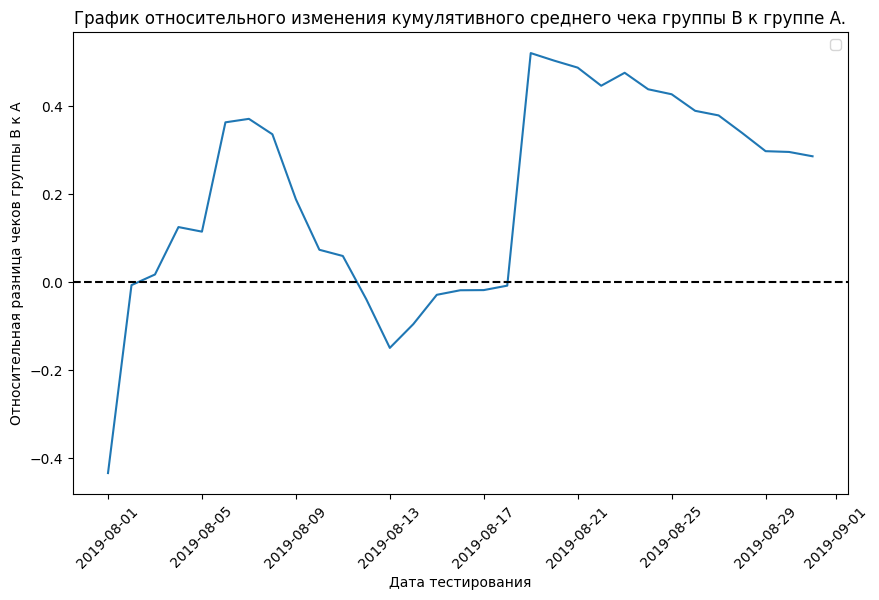

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full['date'], cumulative_full['check_difference'])
plt.legend() 
plt.xlabel('Дата тестирования')
plt.ylabel('Относительная разница чеков группы В к А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

**Вывод: В начале тестирования группа В показывала лучшие результаты, но в районе 10.08.2019 случился резкий спад, возможно из-за того, что в группе А тоже есть аномально большие заказы. 
Далее в районе 18.08.2019 происходит резкий скачок вверх из-за аномально больших заказов в группе В.
Также мы наблюдаем достаточно резкое снижение графика в промежутке с 25.08.2019 по 29.08.2019, возможно из-за аномально больших заказов в группе А.**

##### Построим графики кумулятивного среднего количества заказов на посетителя по группам.

In [49]:
# Посчитаем конверсию в обеих таблицах
cumulative_A['conversion'] = cumulative_A['orders'] / cumulative_A['visitors']
cumulative_B['conversion'] = cumulative_B['orders'] / cumulative_B['visitors']

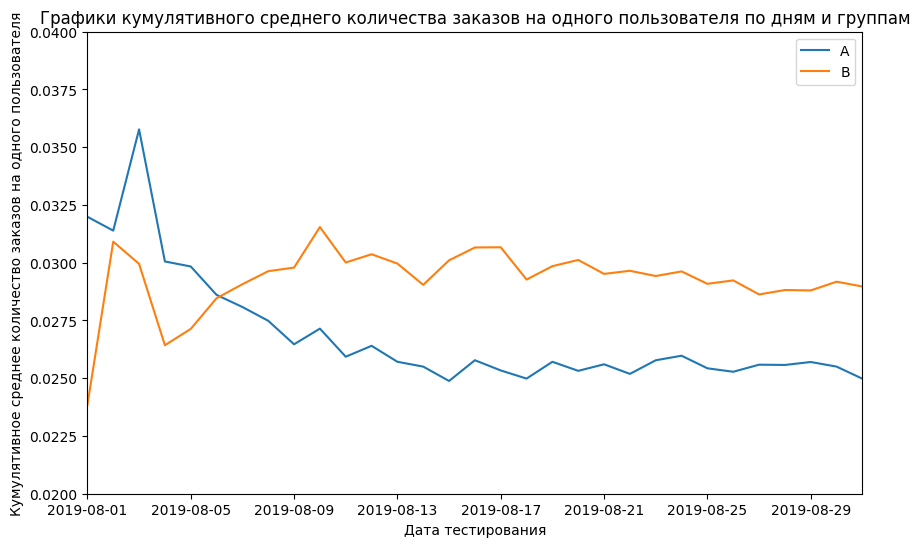

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_A['date'], cumulative_A['conversion'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['conversion'], label='B')
plt.legend() 
plt.xlabel('Дата тестирования')
plt.ylabel('Кумулятивное среднее количество заказов на одного пользователя')
plt.title('Графики кумулятивного среднего количества заказов на одного пользователя по дням и группам')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.02, 0.04])
plt.show()

**Вывод: на протяжении практически всего теста группа В показывает гораздо лучшие результаты чем группа А, к концу теста показатели количества заказов на одного посетителя стабилизировались.** 

##### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [51]:
cumulative_full_2 = cumulative_A.merge(cumulative_B, on='date', how='left', suffixes=['A', 'B'])

In [52]:
cumulative_full_2.head()

,date,revenueA,ordersA,visitorsA,avg_checkA,conversionA,revenueB,ordersB,visitorsB,avg_checkB,conversionB
0,2019-08-01,142779,23,719,6207.782609,0.031989,59758,17,713,3515.176471,0.023843
1,2019-08-02,234381,42,1338,5580.500000,0.031390,221801,40,1294,5545.025000,0.030912
2,2019-08-03,346854,66,1845,5255.363636,0.035772,288850,54,1803,5349.074074,0.029950
3,2019-08-04,388030,77,2562,5039.350649,0.030055,385740,68,2573,5672.647059,0.026428
4,2019-08-05,474413,99,3318,4792.050505,0.029837,475648,89,3280,5344.359551,0.027134


In [53]:
cumulative_full_2['conversion_difference'] = (cumulative_full_2['conversionB'] / cumulative_full_2['conversionA']) - 1

No handles with labels found to put in legend.


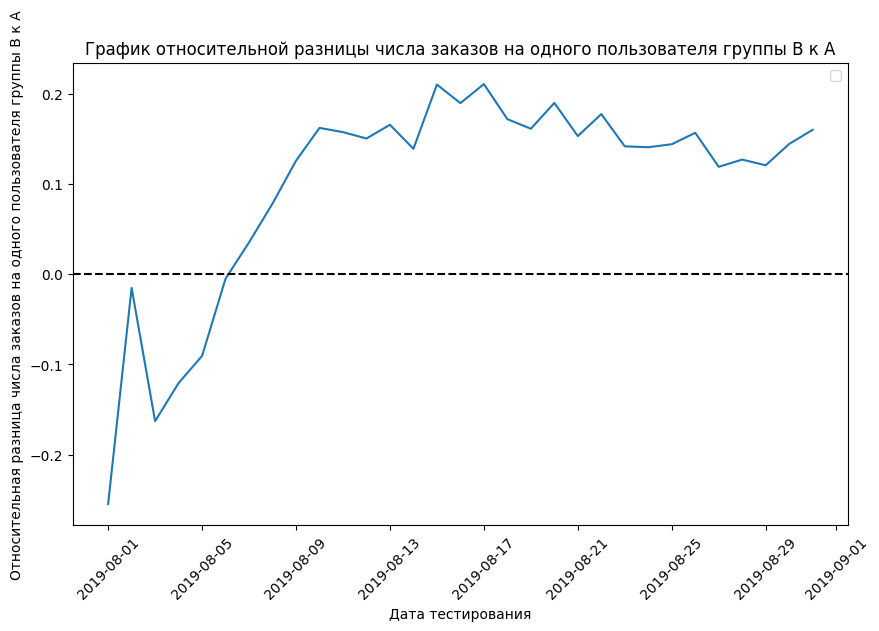

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full_2['date'], cumulative_full_2['conversion_difference'])
plt.legend() 
plt.xlabel('Дата тестирования')
plt.ylabel('Относительная разница числа заказов на одного пользователя группы В к А')
plt.title('График относительной разницы числа заказов на одного пользователя группы В к А')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

**Вывод: группа В показывает значительно лучшие результаты, но возможно это связано с аномальными значениями.**

##### Построим точечный график количества заказов по пользователям

In [55]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [56]:
# Создадим сводную таблицу, чтобы посчитать количество заказов на одного пользователя
order_per_user = orders.pivot_table(index='visitor_id', values='transaction_id', aggfunc=['nunique']).reset_index()

In [57]:
order_per_user.columns = ['user_id', 'orders']

In [58]:
order_per_user.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


No handles with labels found to put in legend.


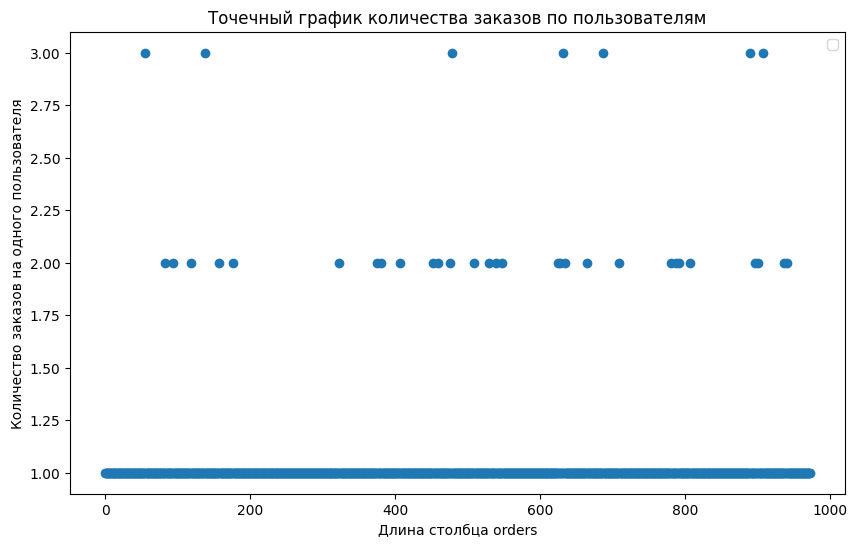

In [59]:
# Построим точечный график
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(order_per_user['orders'])))
plt.scatter(x_values, order_per_user['orders'])
plt.legend() 
plt.xlabel('Длина столбца orders')
plt.ylabel('Количество заказов на одного пользователя')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

**Вывод: подавляющее число пользователей делает 1 заказ.**

##### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [60]:
np.percentile(order_per_user['orders'], [90, 95, 99])

array([1., 1., 2.])

**Вывод: пользователей, которые делают 2 заказа и больше будем считать аномальными.**

##### Построим точечный график стоимостей заказов

No handles with labels found to put in legend.


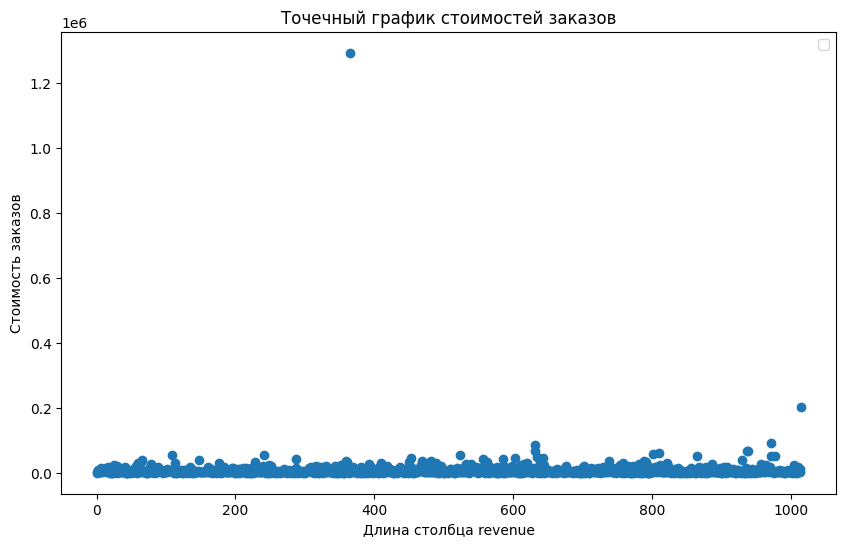

In [61]:
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.legend() 
plt.xlabel('Длина столбца revenue')
plt.ylabel('Стоимость заказов')
plt.title('Точечный график стоимостей заказов')
plt.show()

**По такому графику тяжело сделать какие-то выводы, поэтому построим график еще раз уже с учетом масштаба.**

No handles with labels found to put in legend.


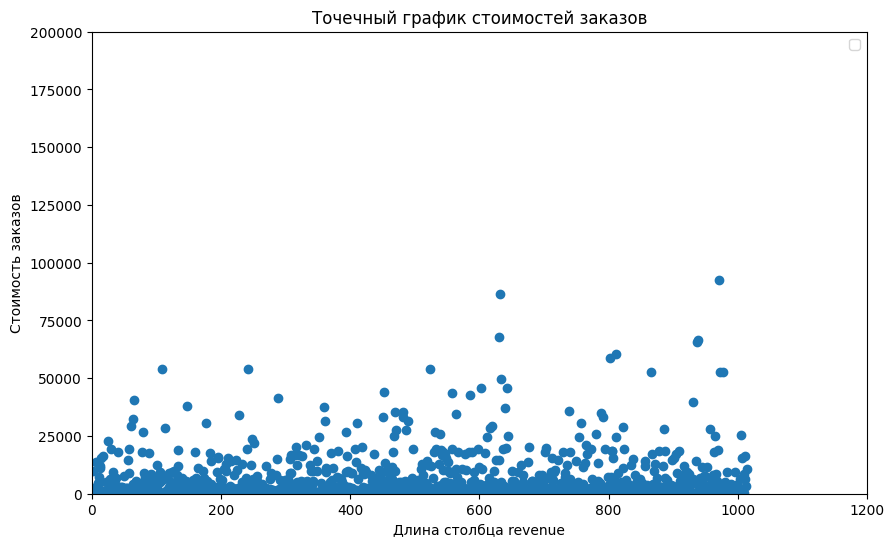

In [62]:
plt.figure(figsize=(10, 6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.legend() 
plt.xlabel('Длина столбца revenue')
plt.ylabel('Стоимость заказов')
plt.title('Точечный график стоимостей заказов')
plt.axis([0, 1200, 0, 200000])
plt.show()

**Вывод: подавляющее число заказов колеблется от 0 до 26 000 рублей включительно.**

##### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [63]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

**Вывод: пользователей, которые делают заказы больше чем на 30 000 рублей, будем считать аномальными.**

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
Сформулируем гипотезы. 
Н0 - различий в среднем количестве заказов между группами А и В нет.
Н1 - различия в среднем количестве заказов между группами А и В есть.

In [64]:
# Начнём с подготовки данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']



In [65]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [66]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

In [67]:
display(ordersByUsersA.head())
ordersByUsersB.head()

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [100]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                                - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                                                                 - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [69]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
# Уровень значимости будем считать равным 0.05
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-значение:', round(results, 3))
if results < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.011
Отвергаем нулевую гипотезу


In [70]:
# Посчитаем относительный прирост среднего числа заказов группы B относительно группы А
round(sampleB.mean() / sampleA.mean() - 1, 2)

0.16

**Вывод: тест Манна-Уитни по сырым данным показал, что различия в среднем количестве заказов между группами есть. Это же подтверждается расчетом относительного прироста среднего числа заказов группы B: количество заказов в группе В на 16% больше чем в группе А.**

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Сформулируем гипотезы. 
Н0 - различий в среднем чеке между группами А и В нет. 
Н1 - различия в среднем чеке между группами А и В есть. 

In [71]:
# Создадим выборки со значениями среднего чека для групп А и В
revenue_A = orders[orders['group']=='A']['revenue']
revenue_B = orders[orders['group']=='B']['revenue']

In [72]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
# Уровень значимости будем считать равным 0.05
alpha = 0.05
results = stats.mannwhitneyu(revenue_A, revenue_B)[1]
print('p-значение:', round(results, 3))
if results < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу


In [73]:
# Посчитаем относительный прирост среднего чека группы B относительно группы А
round(revenue_B.mean() / revenue_A.mean() - 1, 2)

0.29

**Вывод: Средний чек группы В выше среднего чека группы А на 29%, однако тест Манна-Уитни по сырым данным показал, что различий в среднем чеке между группами нет.
Соответственно, можно сделать вывод о том, что разница в 29% не является статистически значимой и в различий в среднем чеке между группами А и В нет.**

##### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
Сформулируем гипотезы. 
Н0 - различий в среднем количестве заказов между группами А и В нет.
Н1 - различия в среднем количестве заказов между группами А и В есть.

In [74]:
order_per_user.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [75]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [76]:
# Получим таблицу пользователей с аномальными значениями числа заказов и суммы заказов
users_with_many_orders = order_per_user.query('orders > 2')['user_id']
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates()

display(abnormal_users.head())
abnormal_users.shape[0]

55      249864742
138     611059232
478    2108163459
632    2742574263
687    2988190573
dtype: int64

49

In [77]:
# В группах А и В оставим только те заказы, которые относятся к "нормальным" пользователям
orders_A_filtered = ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormal_users))]['orders']
orders_B_filtered = ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormal_users))]['orders']

In [101]:
# Объявим переменные sampleA_filtered и sampleB_filtered, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули
sampleA_filtered = pd.concat([orders_A_filtered, pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()\
                                                                    - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_B_filtered, pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()\
                                                                    - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [79]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
# Уровень значимости будем считать равным 0.05
alpha = 0.05
results = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]
print('p-значение:', round(results, 3))
if results < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.01
Отвергаем нулевую гипотезу


In [80]:
# Посчитаем относительный прирост среднего числа заказов группы B относительно группы А
round(sampleB_filtered.mean() / sampleA_filtered.mean() - 1, 2)

0.19

**Вывод: тест Манна-Уитни по очищенным данным показал, что различия в среднем количестве заказов между группами есть. Это же подтверждается расчетом относительного прироста среднего числа заказов группы B: количество заказов в группе В на 19% больше чем в группе А.**

##### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
Сформулируем гипотезы. 
Н0 - различий в среднем чеке между группами А и В нет. 
Н1 - различия в среднем чеке между группами А и В есть.  

In [81]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [102]:
# Создадим выборки со значениями среднего чека для групп А и В
revenue_A_filtered = orders[np.logical_and(orders['group']=='A', 
                                           np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']
revenue_B_filtered = orders[np.logical_and(orders['group']=='B', 
                                           np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [83]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
# Уровень значимости будем считать равным 0.05
alpha = 0.05
results = stats.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)[1]
print('p-значение:', round(results, 3))
if results < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.741
Не получилось отвергнуть нулевую гипотезу


In [84]:
# Посчитаем относительный прирост среднего чека группы B относительно группы А
round(revenue_B_filtered.mean() / revenue_A_filtered.mean() - 1, 2)

-0.03

**Вывод: средний чек группы В ниже среднего чека группы А на 3%, тест Манна-Уитни по очищенным данным показал, что различий в среднем чеке между группами нет.
Соответственно , мы можем сделать вывод о том, что данная разница не является значительной.**

**Посмотрим, как будут вести себя графикиотносительного изменения числа заказов и среднего чека, если убрать аномальных пользователей.**

In [85]:
# Оставляем заказы только нормальных пользователей
orders_wihout_abnormal = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

In [103]:
# Получаем агрегированные кумулятивные по дням данные о заказах 
orders_wihout_abnormal_aggr = datesGroups.apply\
(lambda x: orders_wihout_abnormal[np.logical_and(orders_wihout_abnormal['date'] <= x['date'], 
                                                 orders_wihout_abnormal['group'] == x['group'])]\
 .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

In [87]:
# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data_filtered = orders_wihout_abnormal_aggr.merge(visitors_aggregated, left_on=['date', 'group'], 
                                                             right_on=['date', 'group'])
cumulative_data_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [88]:
# Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_A_filtered = cumulative_data_filtered[cumulative_data['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulative_B_filtered = cumulative_data_filtered[cumulative_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

In [89]:
# В каждую таблицу добавим столбец со средним кумулитивным чеком и конверсией
cumulative_A_filtered['conversion'] = cumulative_A_filtered['orders'] / cumulative_A_filtered['visitors']
cumulative_B_filtered['conversion'] = cumulative_B_filtered['orders'] / cumulative_B_filtered['visitors']
cumulative_A_filtered['avg_check'] = cumulative_A_filtered['revenue'] / cumulative_A_filtered['orders']
cumulative_B_filtered['avg_check'] = cumulative_B_filtered['revenue'] / cumulative_B_filtered['orders']

In [90]:
# Объединяем данные в одну таблицу
cumulative_full_filtered = cumulative_A_filtered.merge(cumulative_B_filtered, on='date', how='left', suffixes=['A', 'B'])
cumulative_full_filtered.head()

,date,revenueA,ordersA,visitorsA,conversionA,avg_checkA,revenueB,ordersB,visitorsB,conversionB,avg_checkB
0,2019-08-01,112340,18,719,0.025035,6241.111111,59758,17,713,0.023843,3515.176471
1,2019-08-02,202252,36,1338,0.026906,5618.111111,152992,38,1294,0.029366,4026.105263
2,2019-08-03,314725,60,1845,0.032520,5245.416667,220041,52,1803,0.028841,4231.557692
3,2019-08-04,355901,71,2562,0.027713,5012.690141,285581,65,2573,0.025262,4393.553846
4,2019-08-05,442284,93,3318,0.028029,4755.741935,375489,86,3280,0.026220,4366.151163


In [104]:
# Считаем разницу в количестве заказов и среднем чеке 
cumulative_full_filtered['check_difference'] = \
(cumulative_full_filtered['avg_checkB'] / cumulative_full_filtered['avg_checkA']) - 1

cumulative_full_filtered['conversion_difference'] = \
(cumulative_full_filtered['conversionB'] / cumulative_full_filtered['conversionA']) - 1


No handles with labels found to put in legend.


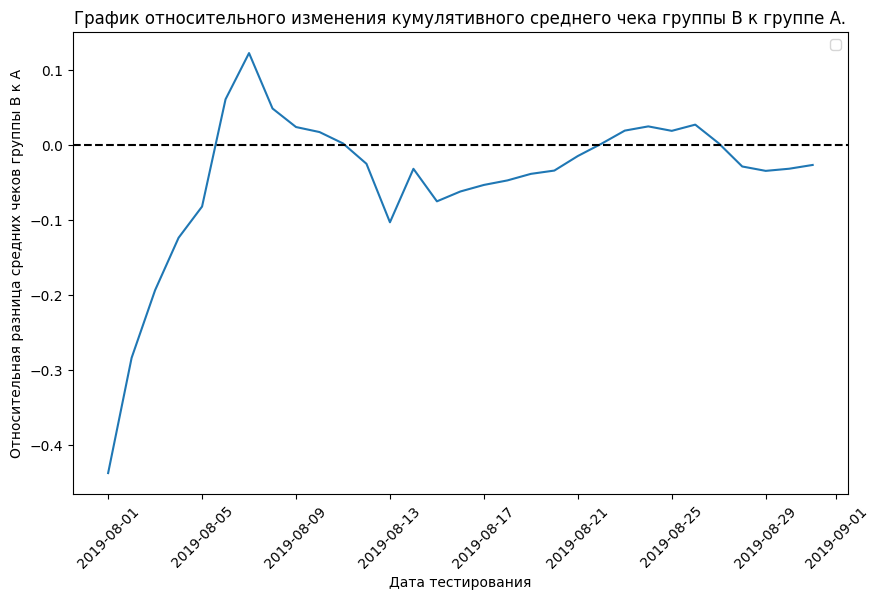

In [105]:
# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full_filtered['date'], cumulative_full_filtered['check_difference'])
plt.legend() 
plt.xlabel('Дата тестирования')
plt.ylabel('Относительная разница средних чеков группы В к А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

No handles with labels found to put in legend.


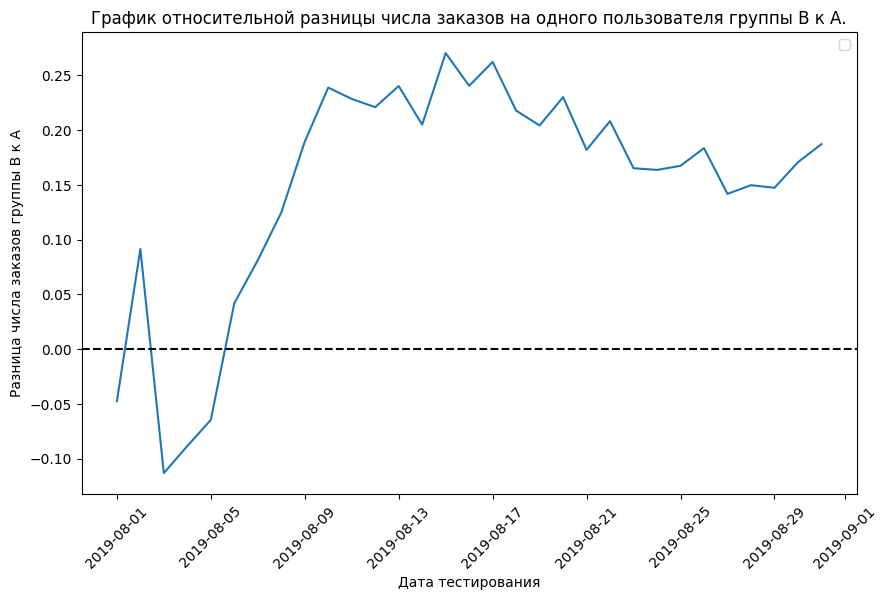

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_full_filtered['date'], cumulative_full_filtered['conversion_difference'])
plt.legend() 
plt.xlabel('Дата тестирования')
plt.ylabel('Разница числа заказов группы В к А')
plt.title('График относительной разницы числа заказов на одного пользователя группы В к А.')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation='45')
plt.show()

**Графики подтверждают результаты тестов - группа В лучше по количеству заказов, но слегка уступает по среднему чеку.**

##### Подведем итоги теста:
1. Между группами А и В есть статистически значимая разница в конверсии , и у группы В конверсия выше (как по сырым, так и по очищенным данным).
2. Между группами А и В нет статистически значимой разницы в среднем чеке групп (как по сырым, так и по очищенным данным).
Соответственно, необходимо принять решение остановить эксперимент и зафиксировать победу группы В.

# Общий вывод по проекту.
В этом проекте мы приоритизировали гипотезы, запускали A/B-тест и анализировали результаты.
Проект разделен на несколько частей: в первой части мы изучали общую информацию о представленных данных и проверяли их на наличие пропусков и дубликатов. Дубликатов и пропусков обнаружено не было. Также было обнаружено 58 пользователей, попавших в обе группы. Было принято решение удалить данных пользователей из рассмотрения.

Во второй части мы приоритизировали гипотезы, используя фреймворки RICE и ICE. Мы получили разные результаты. 
При использовании фреймворка ICE победила гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения".
При использовании фреймворка RICE победила гипотез №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 
Разница в результатах связана с тем, что фреймворк RICE дополнительно учитывает параметр reach, поэтому наибольший балл получила гипотеза №7 у которой параметр reach равен 10.

В третьей части мы анализировали А/В тест. Нам удалось установить следующее:
1. При анализе графиков кумулитивной выручки и кумулитивного среднего чека было обнаружено, что в группе В присутствуют аномально большие заказы.
2. По "сырым" данным группа В показала значительно лучшие результаты. Как по среднему количеству заказов на одного пользователя, так и по среднему чеку.
3. Было принято решение по отсечению аномальных пользователей: с количеством заказов больше 1 и размером заказа больше 30 000 рублей.
4. Статистический тест Манна-Уитни по "сырым" данным показал следующее:
- 4.1 Между группами А и В есть статистически значимая разница в количестве заказов на одного пользователя, разница составила 16% в пользу группы В.
- 4.2 Между группами А и В нет статистически значимой разница в среднем чеке.
5. Статистический тест Манна-Уитни по "очищенным" данным показал следующее:
- 5.1 Между группами А и В есть статистически значимая разница в количестве заказов на одного пользователя, разница составила 19% в пользу группы В.
- 5.2 Между группами А и В нет статистически значимой разница в среднем чеке.

По результатам теста было принято решение остановить эксперимент и зафиксировать победу группы В.
